# Prediction of Different cryptocurrencies prices and calculation of correlation

In [1]:
pip install mpl_finance

In [2]:
pip install seaborn==0.8.1

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# importing packages for plotting candlestick graph
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc

#importing packages for the prediction of time-series data
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

#configuring the Environment
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


Reading CSV files of different CryptoCurrencies and put it into dictionary


In [6]:
crypto_data = {}

crypto_data['bitcoin'] = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'])
crypto_data['bitcoin_cash'] = pd.read_csv("bitcoin_cash_price.csv", parse_dates=['Date'])
crypto_data['dash'] = pd.read_csv("dash_price.csv", parse_dates=['Date'])
crypto_data['ethereum'] = pd.read_csv("ethereum_price.csv", parse_dates=['Date'])
crypto_data['iota'] = pd.read_csv("iota_price.csv", parse_dates=['Date'])
crypto_data['litecoin'] = pd.read_csv("litecoin_price.csv", parse_dates=['Date'])
crypto_data['monero'] = pd.read_csv("monero_price.csv", parse_dates=['Date'])
crypto_data['nem'] = pd.read_csv("nem_price.csv", parse_dates=['Date'])
crypto_data['neo'] = pd.read_csv("neo_price.csv", parse_dates=['Date'])
crypto_data['numeraire'] = pd.read_csv("numeraire_price.csv", parse_dates=['Date'])
crypto_data['ripple'] = pd.read_csv("ripple_price.csv", parse_dates=['Date'])
crypto_data['stratis'] = pd.read_csv("stratis_price.csv", parse_dates=['Date'])
crypto_data['waves'] = pd.read_csv("waves_price.csv", parse_dates=['Date'])


# Closing Price distribution of different cryptocurrencies

Taking different cryptocurrencies in dataframes and then selecting columns which is used for plotting prices.

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


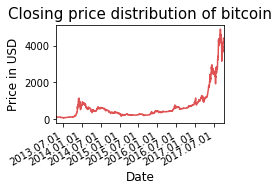

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


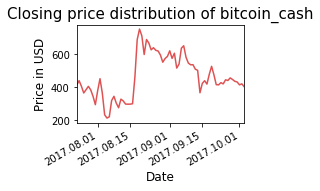

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


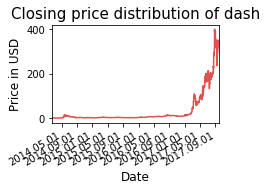

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


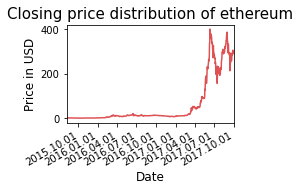

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


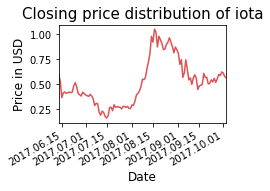

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


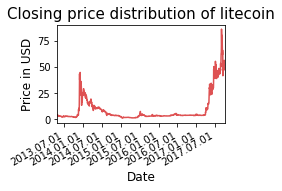

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


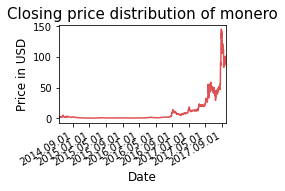

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


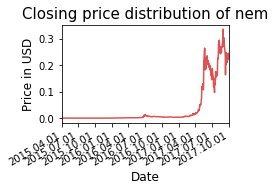

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


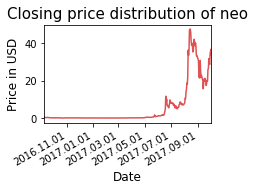

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


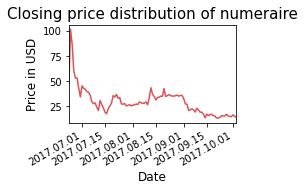

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


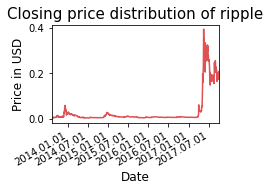

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


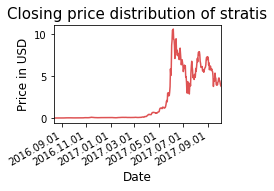

/usr/local/lib/python3.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


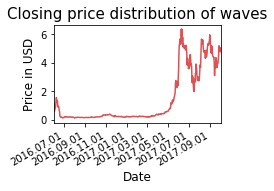

In [7]:

for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    df = df[['Date' , 'Close']]
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x)) # making new column 'Date_mpl' by using date2num lamba function
    fig, ax = plt.subplots(figsize=(3,2))
    sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + coin
    plt.title(title_str, fontsize=15)
    plt.show()

# CandleStick Chart for different Cryptocurrencies

CandleStick Chart is used for the representation financial data. Chart will be based on four columns such as Open, Close, High, Low. The hollow and filled portion in chart represented as if stocks closes higher than its opening values with top line represent as closing price and bottom line as opening price and if stocks closes lower than its opening values with top line represent as opening price and bottom lines as closing price respectively.

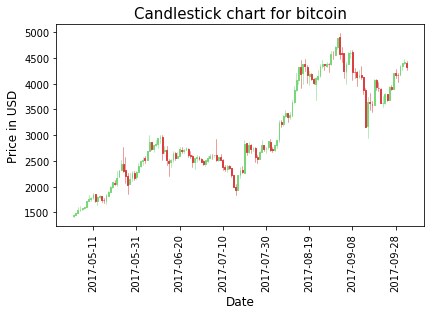

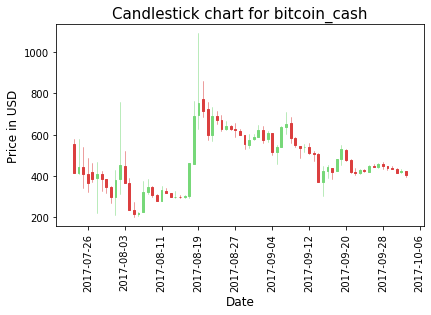

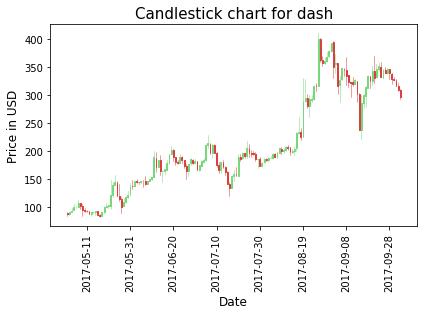

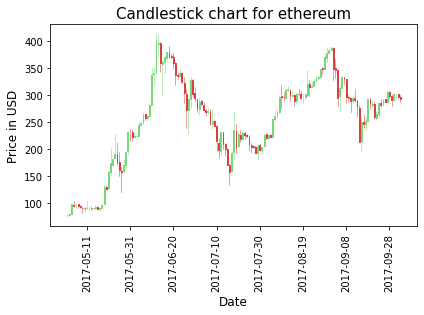

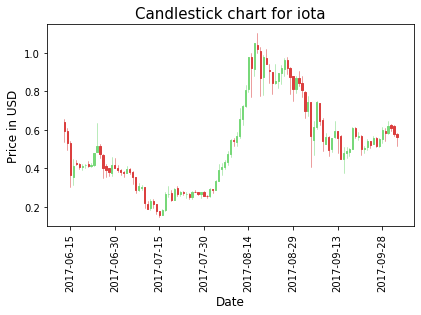

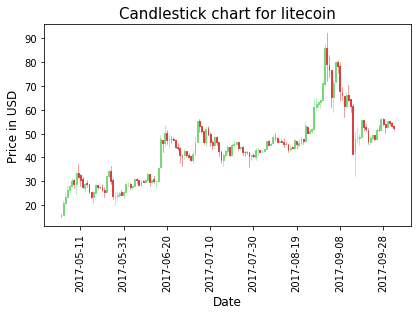

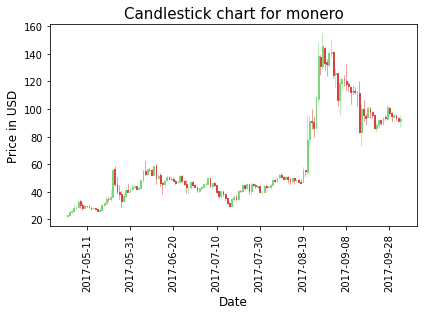

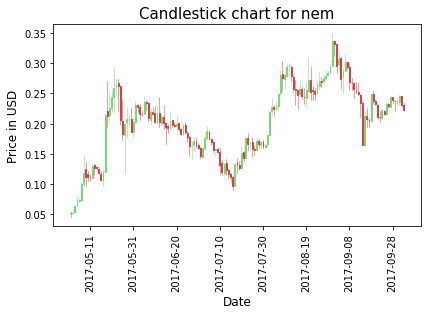

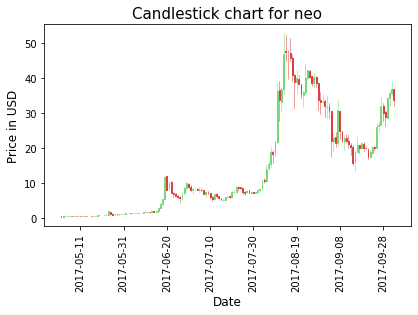

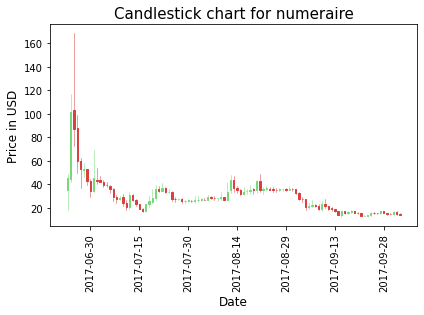

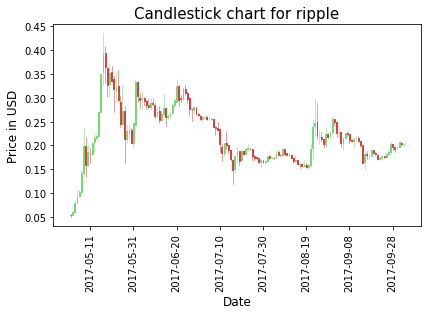

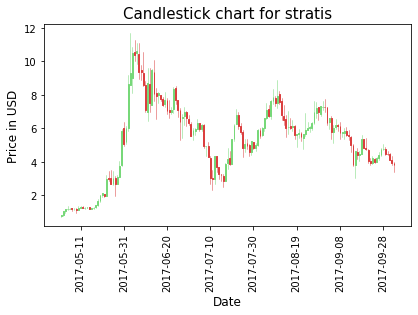

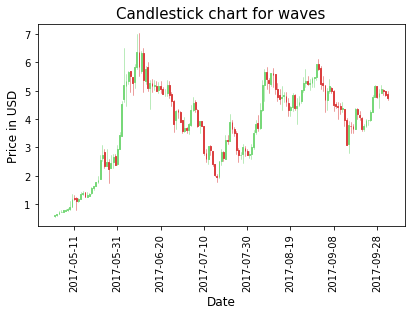

In [8]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
    temp_df = df[df['Date']>'2017-05-01']
    ohlc = []
    for ind, row in temp_df.iterrows():
        ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
        ohlc.append(ol)

    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

    plt.xlabel("Date", fontsize=12)
    plt.xticks(rotation='vertical')
    plt.ylabel("Price in USD", fontsize=12 )
    title_str = "Candlestick chart for " + coin
    plt.title(title_str, fontsize=15)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

In [9]:
del crypto_data['iota'], crypto_data['numeraire'], crypto_data['bitcoin_cash']

# Correlation Map by implementing different models

Correlation is a method of defining linear relationship between two variables. Here variables are different cryptocurrencies. Correlation here is calculated using three techniques such as: Spearman, Pearson, Kendall.

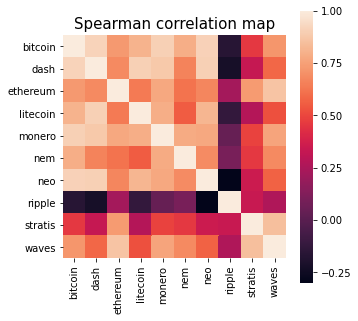

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.914531,0.726564,0.807568,0.905473,0.794435,0.910046,-0.165415,0.459659,0.717617
dash,0.914531,1.000000,0.680765,0.907473,0.882321,0.662038,0.906313,-0.221101,0.330550,0.587892
ethereum,0.726564,0.680765,1.000000,0.635456,0.776019,0.615269,0.673348,0.230670,0.732084,0.866832
litecoin,0.807568,0.907473,0.635456,1.000000,0.796681,0.555973,0.820562,-0.122343,0.275247,0.523164
monero,0.905473,0.882321,0.776019,0.796681,1.000000,0.786479,0.773002,0.043838,0.489196,0.762118
nem,0.794435,0.662038,0.615269,0.555973,0.786479,1.000000,0.687436,0.096394,0.457966,0.684301
neo,0.910046,0.906313,0.673348,0.820562,0.773002,0.687436,1.000000,-0.299865,0.350628,0.572132
ripple,-0.165415,-0.221101,0.230670,-0.122343,0.043838,0.096394,-0.299865,1.000000,0.339029,0.262035
stratis,0.459659,0.330550,0.732084,0.275247,0.489196,0.457966,0.350628,0.339029,1.000000,0.850134
waves,0.717617,0.587892,0.866832,0.523164,0.762118,0.684301,0.572132,0.262035,0.850134,1.000000


In [10]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Spearman correlation map", fontsize=15)
plt.show()
temp_df.corr(method='spearman')

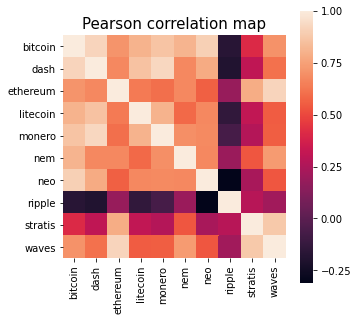

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.921408,0.713243,0.808501,0.862747,0.815765,0.905562,-0.169163,0.410236,0.707216
dash,0.921408,1.000000,0.675973,0.860210,0.931274,0.672795,0.783124,-0.195296,0.306310,0.610040
ethereum,0.713243,0.675973,1.000000,0.635205,0.603051,0.676897,0.563220,0.181955,0.785574,0.921006
litecoin,0.808501,0.860210,0.635205,1.000000,0.807678,0.587752,0.673954,-0.138019,0.313985,0.553962
monero,0.862747,0.931274,0.603051,0.807678,1.000000,0.696245,0.680151,-0.064619,0.272784,0.556851
nem,0.815765,0.672795,0.676897,0.587752,0.696245,1.000000,0.677668,0.194928,0.534678,0.733841
neo,0.905562,0.783124,0.563220,0.673954,0.680151,0.677668,1.000000,-0.309045,0.237412,0.538941
ripple,-0.169163,-0.195296,0.181955,-0.138019,-0.064619,0.194928,-0.309045,1.000000,0.283663,0.214280
stratis,0.410236,0.306310,0.785574,0.313985,0.272784,0.534678,0.237412,0.283663,1.000000,0.879594
waves,0.707216,0.610040,0.921006,0.553962,0.556851,0.733841,0.538941,0.214280,0.879594,1.000000


In [11]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
temp_df.corr(method='pearson')

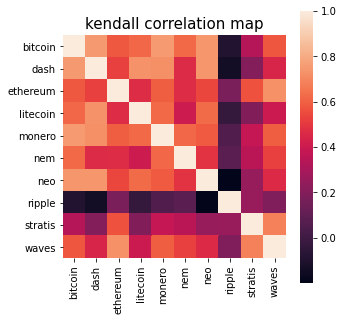

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.748136,0.581675,0.620045,0.751885,0.622958,0.741160,-0.088898,0.338058,0.576964
dash,0.748136,1.000000,0.519502,0.731333,0.722893,0.465270,0.738143,-0.141014,0.201694,0.443289
ethereum,0.581675,0.519502,1.000000,0.470312,0.594796,0.467887,0.537646,0.175458,0.565774,0.725512
litecoin,0.620045,0.731333,0.470312,1.000000,0.622444,0.403000,0.625461,-0.033939,0.190320,0.397064
monero,0.751885,0.722893,0.594796,0.622444,1.000000,0.617647,0.586860,0.049690,0.379015,0.596302
nem,0.622958,0.465270,0.467887,0.403000,0.617647,1.000000,0.488436,0.085379,0.352315,0.523460
neo,0.741160,0.738143,0.537646,0.625461,0.586860,0.488436,1.000000,-0.198676,0.254215,0.459764
ripple,-0.088898,-0.141014,0.175458,-0.033939,0.049690,0.085379,-0.198676,1.000000,0.256206,0.189023
stratis,0.338058,0.201694,0.565774,0.190320,0.379015,0.352315,0.254215,0.256206,1.000000,0.683762
waves,0.576964,0.443289,0.725512,0.397064,0.596302,0.523460,0.459764,0.189023,0.683762,1.000000


In [12]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='kendall')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("kendall correlation map", fontsize=15)
plt.show()
temp_df.corr(method='kendall')

# Prediction of Future values of Cryptocurrencies

For the prediction of future values package used here is Fbprophet. Fbprophet is a package used for predicting Time-series data.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality

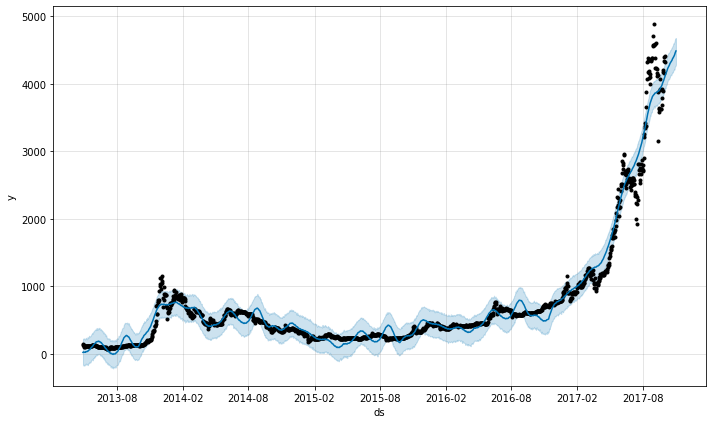

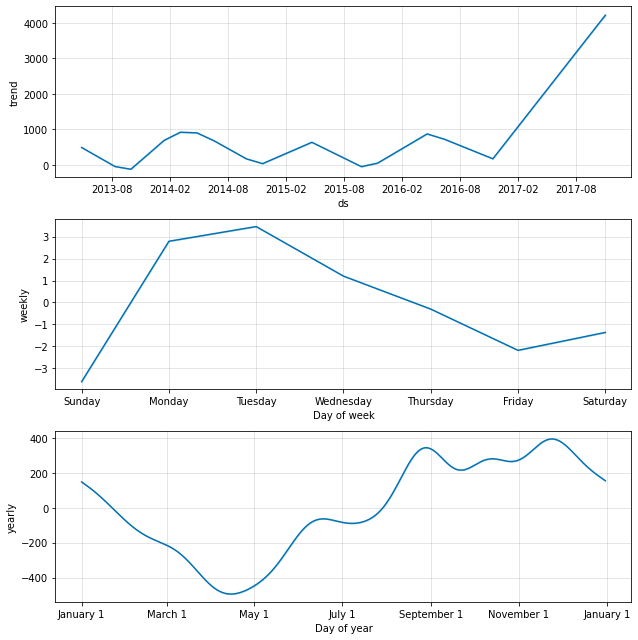

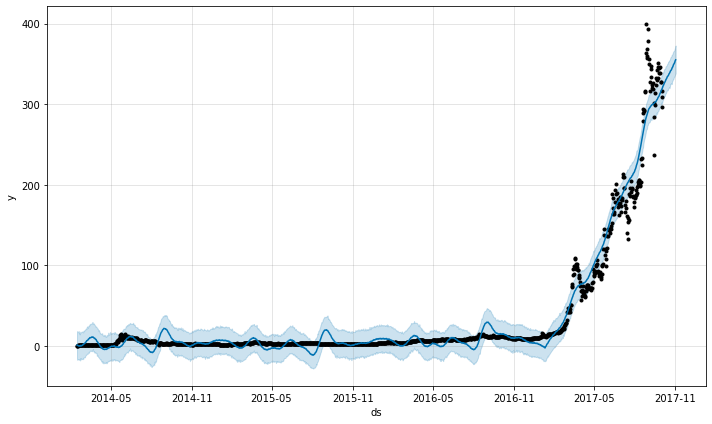

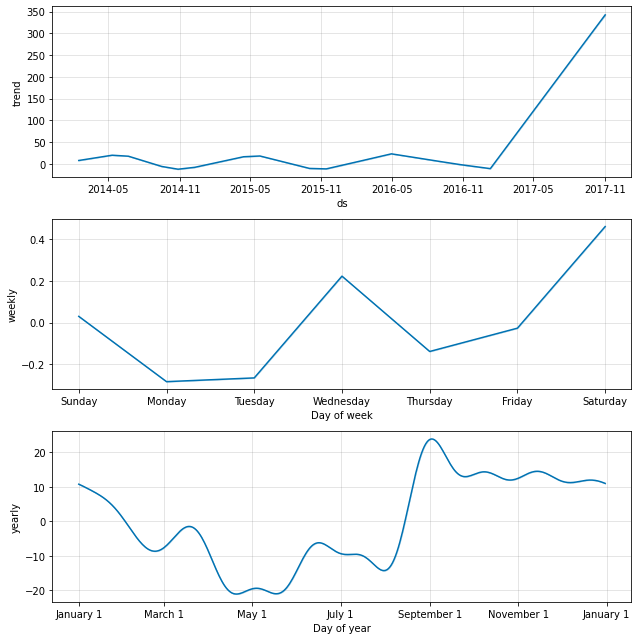

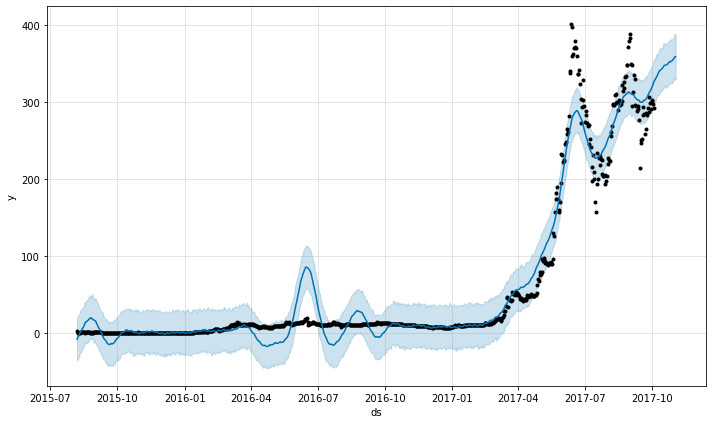

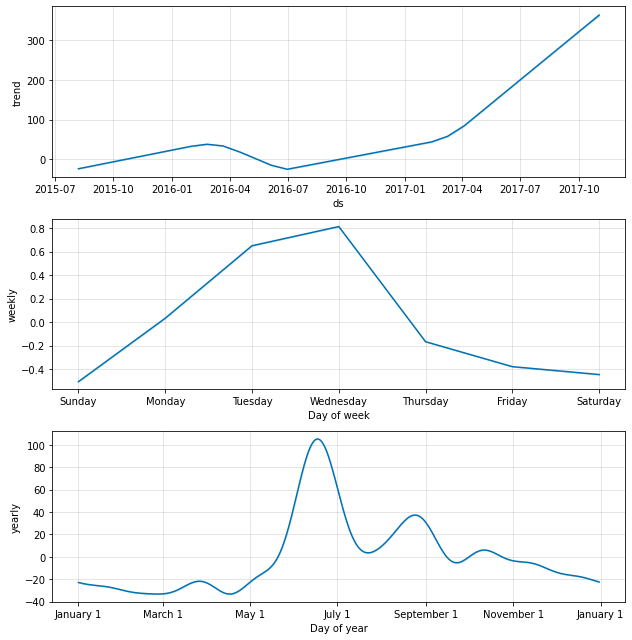

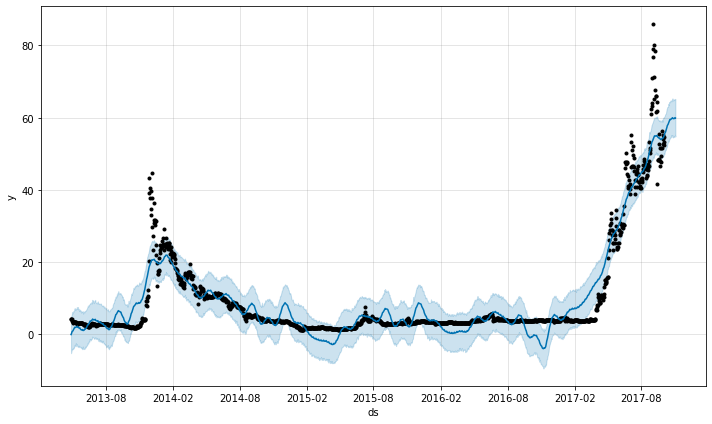

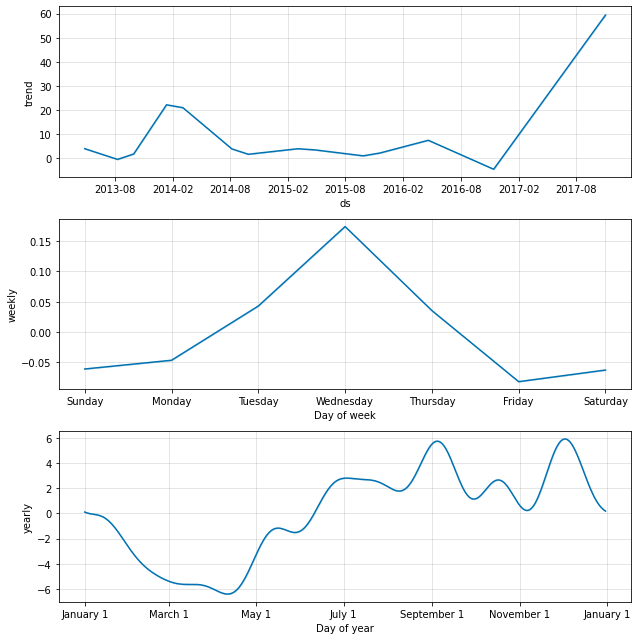

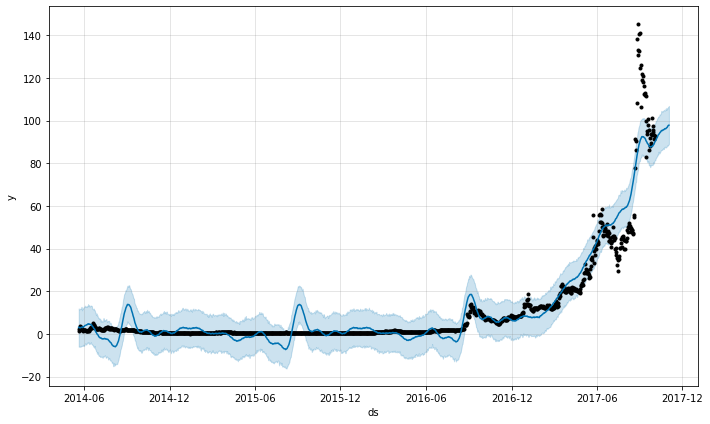

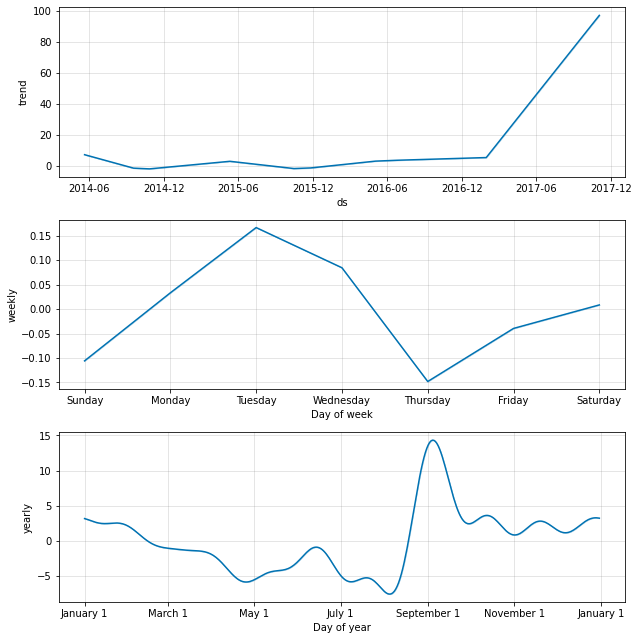

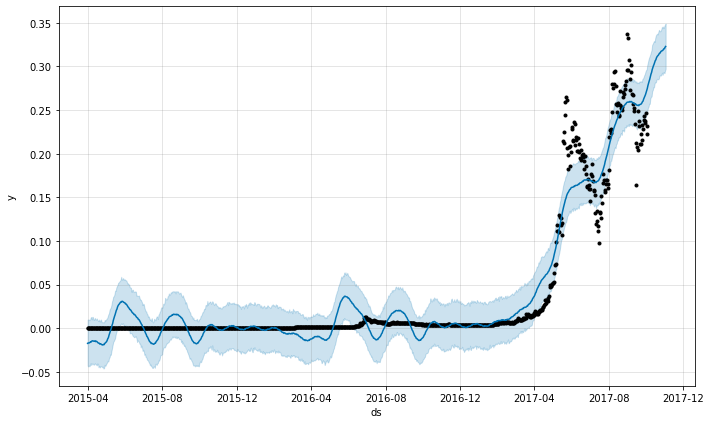

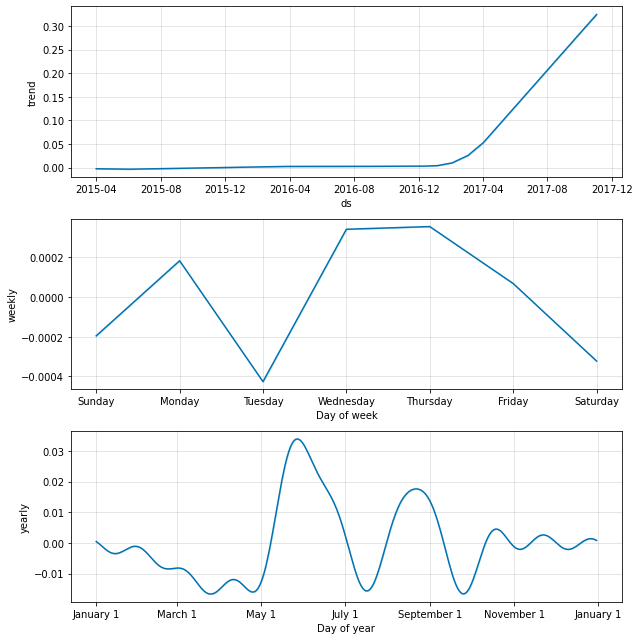

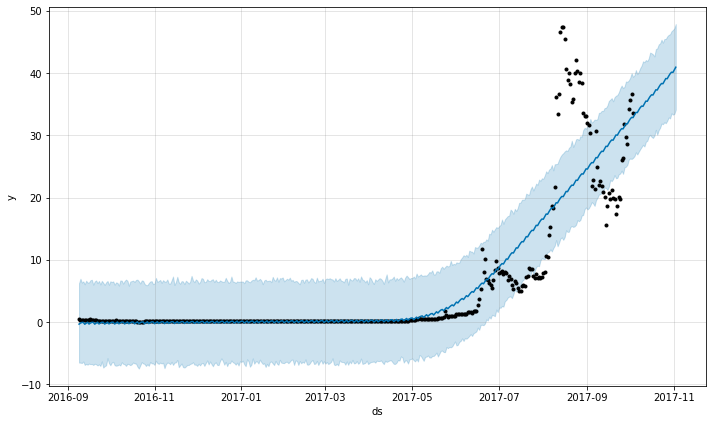

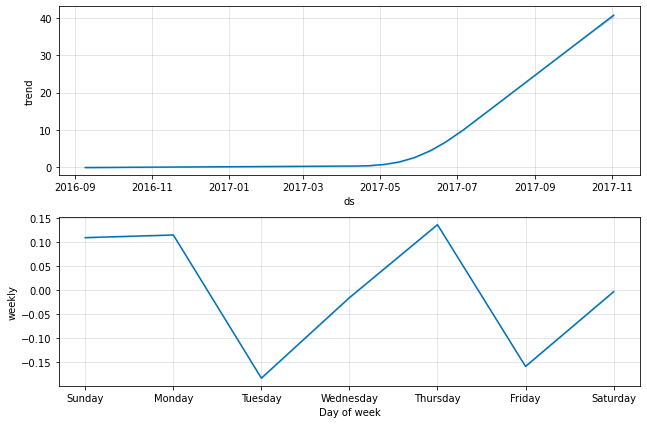

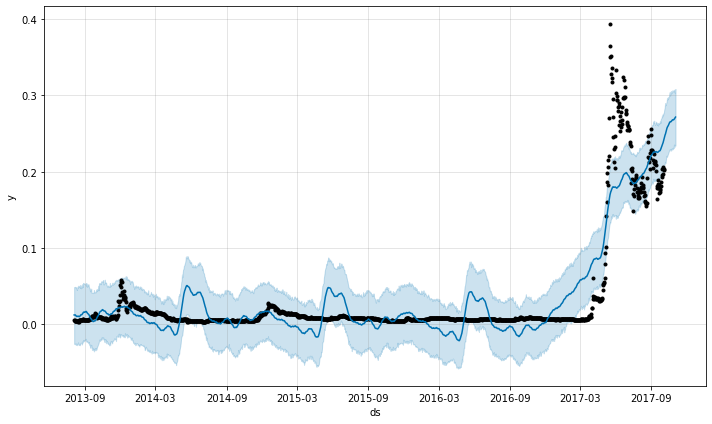

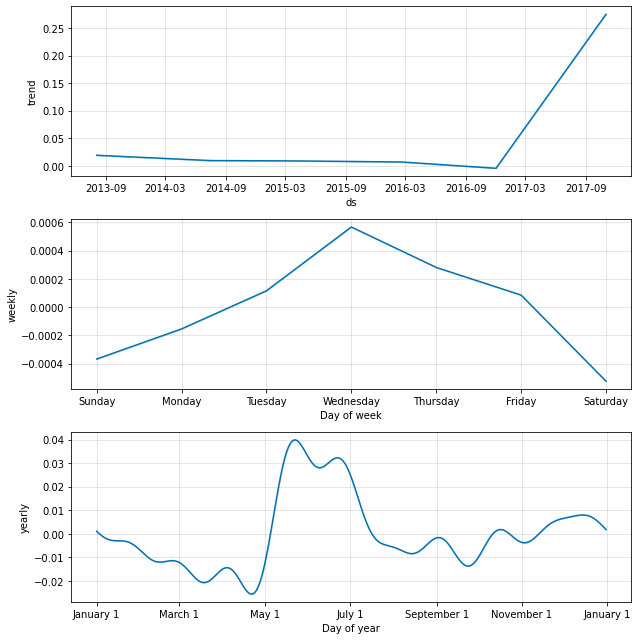

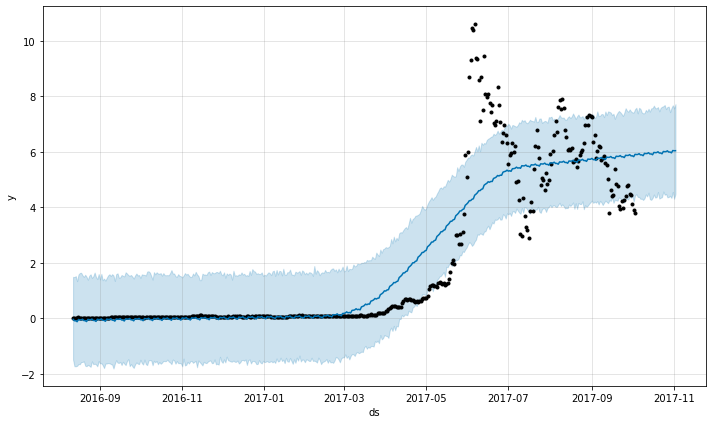

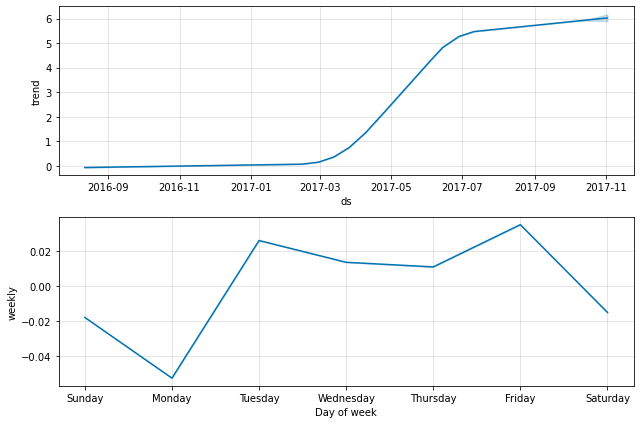

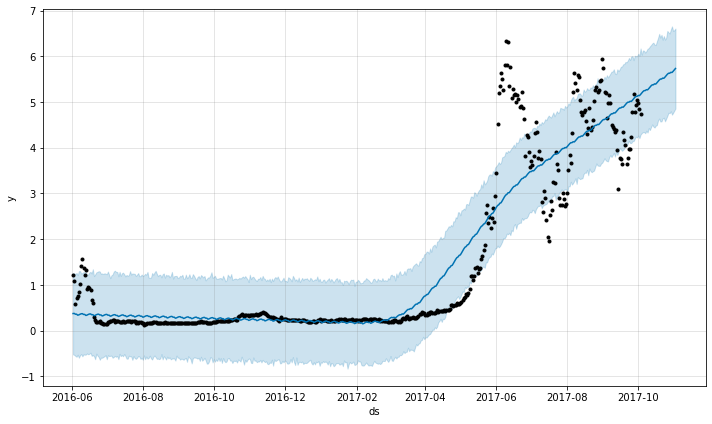

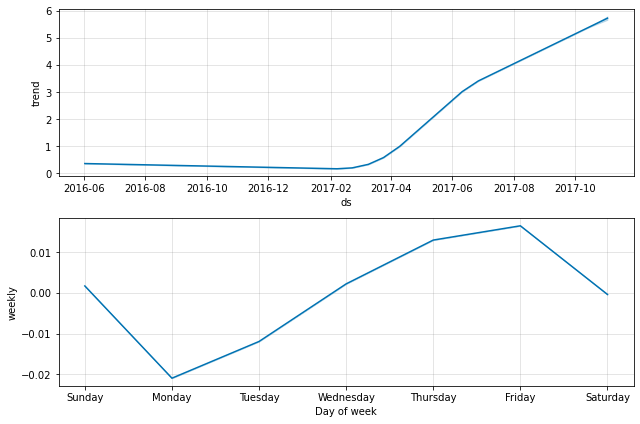

In [13]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    temp_df = pd.DataFrame()
    temp_df['ds'] = df['Date']
    temp_df['y'] = df['Close']
    model = Prophet()
    model.fit(temp_df)
    future = model.make_future_dataframe(periods = 30)
    forecast = model.predict(future)
    title_str = "predicted value of "+ coin
    model.plot(forecast)
    model.plot_components(forecast)